# Data augmentaion


To augment a dataset, we need to generate new samples from it that are plausible, meaning they could really occur in the dataset. In general, you should perform data augmentation whenever possible, especially if the dataset is small. Data augmentation is perhaps the easiest way to regularize the netowork as it learns. Additionally, data augmentatoin helps reduce the overfitting when training. Care should be taken to include original and all of the augmented images of the original image to the same segment of the dataset (for example : training/validation) never mix with training, validation and test set.

steps for data augmentation
* Split the dataset in to training, validation and test set
* Augment the training data set and label as new training set
* Include orginal training set + augmented data set for training

PCA is used for data augmentation for feature vectors. Lets see an example of PCA applied to Iris datset.

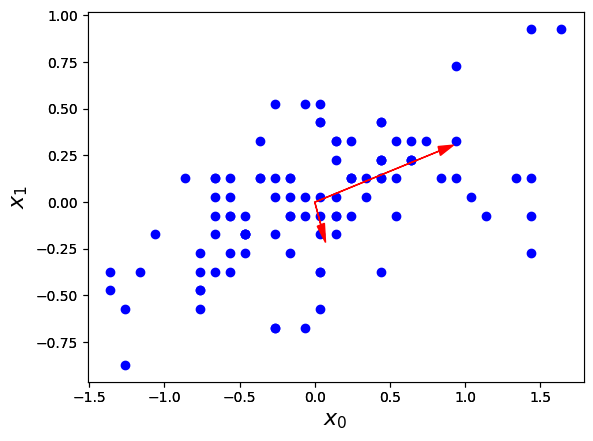

In [1]:
import numpy as np
from sklearn import decomposition
import matplotlib.pylab as plt

x = np.load("./data/iris_features.npy")[:,:2]
y = np.load("./data/iris_labels.npy")

idx = np.where(y != 0) # excluding the class 0, keeping only class 1 , 2
x = x[idx]
x[:,0] -= x[:,0].mean() # mean shifting
x[:,1] -= x[:,1].mean()

pca = decomposition.PCA(n_components=2)
pca.fit(x)
v = pca.explained_variance_ratio_
plt.scatter(x[:,0], x[:,1], marker='o', color="b")
ax = plt.axes()
plt.scatter(x[:,0],x[:,1],marker='o',color='b')
# PCA compenets are unit vectors, hence need to scale them with correct explained proportions
x0 = v[0]*pca.components_[0,0]
y0 = v[0]*pca.components_[0,1]
ax.arrow(0, 0, x0, y0, head_width=0.05, head_length=0.1, fc='r', ec='r')
x1 = v[1]*pca.components_[1,0] 
y1 = v[1]*pca.components_[1,1]
ax.arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)
plt.show()

Above image shows PCA applied to Iris data set (only 2 features, only 1,2 classes). PCA tells you the direction of the variance of the data, these directions are the principle components. PCA also tells you how much of the variance of the data is explained by each these directions (proportions). In the above case, first PCA component (largest) represents the 84 % variation and other direction represent the other 16%. PCA can be used to get rid of useless features in the dataset (Dimensional reduction) still representing the data well. For the data augmetation however, we keep all the features. Lets now use the PCA to augment the Iris data.

Once PCA components are known, any input data can be tranformed to PCA space i.e align with PCA components direction (pca.transform()) and transform back to original space (inverse_transform) as this is exact mapping (you will end up with same data before transforming). But for augmentation, we first transform, introduce error (change the PCA components directions slightly based on normal distrubution) and then inverse transform back to original space. This produces the new data not exactly as original data but based on original data (Augmented based on original). This augmented data can be used along with original data for training.   



In [ ]:
import numpy as np
from sklearn import decomposition

def 